Importing packages

In [83]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Preparing the data
- Opening file
- Normalising data
- Dividing into train and test datasets

In [35]:
df = pd.read_csv("kc_house_data.csv").set_index('id')
df['date'] = df['date'].apply(lambda x: int(x.split('T')[0]))
df.astype('float')

norm_df = (df - df.mean()) / df.std()

test_df = norm_df.sample(frac=0.2)
train_df = norm_df.drop(test_df.index)

label_train = train_df.pop('price')
label_test = test_df.pop('price')

train_df.head(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,-0.651328,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
6414100192,-0.607149,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863
5631500400,1.425045,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,-0.629172,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371
2487200875,-0.607149,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,2.444237,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
1954400510,1.423468,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,-0.629172,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844
7237550310,-0.764252,0.676469,3.097062,3.636707,2.096136,-0.915406,-0.087171,-0.305752,-0.629172,2.844104,2.537897,2.798375,1.021157,-0.210124,-0.466121,0.693165,1.483341,4.046517,3.265491
1321400060,-0.738331,-0.398728,0.175603,-0.397303,-0.200093,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,-0.088626,-0.658666,0.816891,-0.210124,-1.400612,-1.806768,-0.803131,0.366867,-0.217895
2008000270,1.400252,-0.398728,-0.798217,-1.110469,-0.130273,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.879602,-0.658666,-0.272530,-0.210124,2.243905,-1.086522,-0.717921,-0.491037,-0.111978
2414600126,1.467871,-0.398728,-1.447430,-0.326531,-0.184376,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.891678,0.990772,-0.374663,-0.210124,1.272034,-0.344625,-0.874139,-0.301364,-0.170503


# Creating linear models
- Fitting the model
- Predicting test data

In [127]:
def classifier(model):
    model.fit(train_df, label_train)
    pred = model.predict(test_df)
    print(f"MSE: {mean_squared_error(pred, label_test)}, MAE: {mean_absolute_error(pred, label_test)}")

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, label_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(label_test, label_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred)))

Mean Absolute Error: 0.344647627724446
Mean Squared Error: 0.327706885007635
Root Mean Squared Error: 0.5724568848460424


The best linear model is linear regression model, with MSE of 0.33. 
I will make a plot of results from first 50 predicted prices.

In [129]:
regressor = LinearRegression()  
regressor.fit(train_df, label_train)

label_pred = regressor.predict(test_df)
pred_df = pd.DataFrame({'Actual': label_test, 'Predicted': label_pred.flatten()})

Plotting 

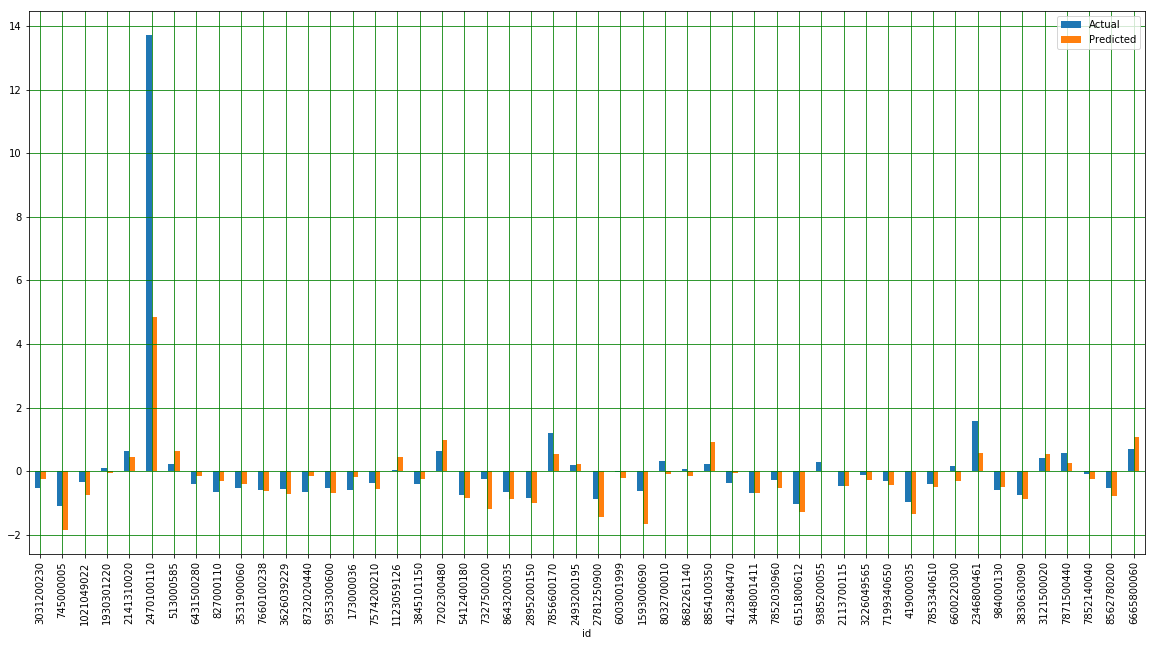

In [130]:
df1 = pred_df.head(50)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', color='green')
plt.grid(which='minor', linestyle=':', color='black')
plt.show()

MSE and MAE

In [128]:
classifier(LinearRegression())
classifier(Ridge(alpha=.1))
classifier(ElasticNet(random_state=0))

MSE: 0.327706885007635, MAE: 0.344647627724446
MSE: 0.32770676763424983, MAE: 0.3446469139901962
MSE: 0.8527045663893448, MAE: 0.5603741658937076
